####  Hourly Energy Consumption Forecast 

**Business Objective:
PJM Hourly Energy Consumption Data
PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.**

**The hourly power consumption data comes from PJM's website and are in megawatts (MW).**

**The regions have changed over the years so data may only appear for certain dates per region.**

**●Split the last year into a test set- can you build a model to predict energy consumption?**

**●Find trends in energy consumption around hours of the day, holidays, or long term trends?**

**●Understand how daily trends change depending of the time of year. Summer trends are very different than winter trends.**

**●Forecast for next 30 days.**


### #############################################################################################

###### Throughout this project, we will be building a model to forecast monthly electricity consumption from PJM'S website. This model will be based  on time series data.

In [1]:
## importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Exploratory Data Analysis


In [2]:
df=pd.read_csv('PJMW_hourly.csv',index_col='Datetime',parse_dates=True)
df

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077.0
2002-12-31 02:00:00,4939.0
2002-12-31 03:00:00,4885.0
2002-12-31 04:00:00,4857.0
2002-12-31 05:00:00,4930.0
...,...
2018-01-01 20:00:00,8401.0
2018-01-01 21:00:00,8373.0
2018-01-01 22:00:00,8238.0


In [3]:
df.sort_index(inplace=True)
df

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374.0
2002-04-01 02:00:00,4306.0
2002-04-01 03:00:00,4322.0
2002-04-01 04:00:00,4359.0
2002-04-01 05:00:00,4436.0
...,...
2018-08-02 20:00:00,6545.0
2018-08-02 21:00:00,6496.0
2018-08-02 22:00:00,6325.0


###### Our dataset is quite extensive which is starts in 2002 and end in 2018.

In [4]:
df.shape

(143206, 1)

###### so the data has 143206 rows and 1 column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143206 entries, 2002-04-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJMW_MW  143206 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [6]:
df.describe()

,PJMW_MW
count,143206.000000
mean,5602.375089
std,979.142872
min,487.000000
25%,4907.000000
50%,5530.000000
75%,6252.000000
max,9594.000000


### duplicates values

In [7]:
df[df.index.duplicated()]

,PJMW_MW
Datetime,
2014-11-02 02:00:00,4613.0
2015-11-01 02:00:00,3832.0
2016-11-06 02:00:00,4089.0
2017-11-05 02:00:00,4042.0


###### so there are 4 duplicates column found

In [8]:
df = df.groupby('Datetime').agg(np.mean)
df

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374.0
2002-04-01 02:00:00,4306.0
2002-04-01 03:00:00,4322.0
2002-04-01 04:00:00,4359.0
2002-04-01 05:00:00,4436.0
...,...
2018-08-02 20:00:00,6545.0
2018-08-02 21:00:00,6496.0
2018-08-02 22:00:00,6325.0


###### by replacing the duplicated values with mean values of the original value and its duplicated one then the numbers of rows  decreases in the data set.(as we have 4 duplicated values so the no of rows decreases is 4)

In [9]:
## setting frequency
df = df.asfreq('H')

#### missing values

In [10]:
df.isnull().sum()

PJMW_MW    30
dtype: int64

In [11]:
df[df.isnull().values]

,PJMW_MW
Datetime,
2002-04-07 03:00:00,NaN
2002-10-27 02:00:00,NaN
2003-04-06 03:00:00,NaN
2003-10-26 02:00:00,NaN
2004-04-04 03:00:00,NaN
2004-10-31 02:00:00,NaN
2005-04-03 03:00:00,NaN
2005-10-30 02:00:00,NaN
2006-04-02 03:00:00,NaN


In [12]:
df['PJMW_MW'] = df['PJMW_MW'].interpolate() 

In [13]:
df.PJMW_MW

Datetime
2002-04-01 01:00:00    4374.0
2002-04-01 02:00:00    4306.0
2002-04-01 03:00:00    4322.0
2002-04-01 04:00:00    4359.0
2002-04-01 05:00:00    4436.0
                        ...  
2018-08-02 20:00:00    6545.0
2018-08-02 21:00:00    6496.0
2018-08-02 22:00:00    6325.0
2018-08-02 23:00:00    5892.0
2018-08-03 00:00:00    5489.0
Freq: H, Name: PJMW_MW, Length: 143232, dtype: float64

In [14]:
df.isnull().sum()

PJMW_MW    0
dtype: int64

In [15]:
df.shape

(143232, 1)

In [16]:
def data_prep(df):
    df2=pd.DataFrame()
    df2['year'] = df.index.year
    df2['month'] = df.index.month
    df2['month_name'] = df.index.month_name()
    df2['week_of_year'] = df.index.weekofyear
    df2['quarter'] = df.index.quarter
    df2['day_of_week'] = df.index.dayofweek
    df2['day_of_week_name'] = df.index.day_name()
    df2['day_of_month'] = df.index.day
    df2['day_of_year'] = df.index.dayofyear
    df2['hour'] = df.index.hour
    df2['PJMW_MW']=df.PJMW_MW.values
    
    return df2

In [17]:
df2=data_prep(df)

C:\Users\mrsks\AppData\Local\Temp\ipykernel_18152\2083408773.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df2['week_of_year'] = df.index.weekofyear


In [18]:
df2

,year,month,month_name,week_of_year,quarter,day_of_week,day_of_week_name,day_of_month,day_of_year,hour,PJMW_MW
0,2002,4,April,14,2,0,Monday,1,91,1,4374.0
1,2002,4,April,14,2,0,Monday,1,91,2,4306.0
2,2002,4,April,14,2,0,Monday,1,91,3,4322.0
3,2002,4,April,14,2,0,Monday,1,91,4,4359.0
4,2002,4,April,14,2,0,Monday,1,91,5,4436.0
...,...,...,...,...,...,...,...,...,...,...,...
143227,2018,8,August,31,3,3,Thursday,2,214,20,6545.0
143228,2018,8,August,31,3,3,Thursday,2,214,21,6496.0
143229,2018,8,August,31,3,3,Thursday,2,214,22,6325.0
143230,2018,8,August,31,3,3,Thursday,2,214,23,5892.0


In [19]:
df

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374.0
2002-04-01 02:00:00,4306.0
2002-04-01 03:00:00,4322.0
2002-04-01 04:00:00,4359.0
2002-04-01 05:00:00,4436.0
...,...
2018-08-02 20:00:00,6545.0
2018-08-02 21:00:00,6496.0
2018-08-02 22:00:00,6325.0


In [20]:
# Creating times grouped dataframes in order to analyse them
df2_year = df2.groupby('year')['PJMW_MW'].mean()
df2_month = df2.groupby('month_name', sort = False)['PJMW_MW'].mean()
df2_week_of_year = df2.groupby('week_of_year')['PJMW_MW'].mean()
df2_quarter = df2.groupby('quarter')['PJMW_MW'].mean()
df2_day_of_week = df2.groupby('day_of_week_name', sort = False)['PJMW_MW'].mean()
df2_day_of_month = df2.groupby('day_of_month')['PJMW_MW'].mean()
df2_day_of_year = df2.groupby('day_of_year')['PJMW_MW'].mean()
df2_hour = df2.groupby('hour')['PJMW_MW'].mean()

### plot for yearly,monthly,weekly and hourly energy consumption.

Text(0, 0.5, 'Energy Consumption (MW)')

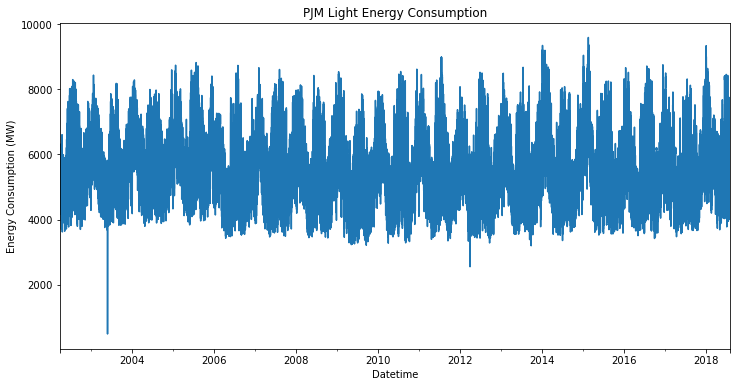

In [21]:
df['PJMW_MW'].plot(figsize =(12,6))
plt.title('PJM Light Energy Consumption')
plt.ylabel('Energy Consumption (MW)')

###### With this volume of data, we can’t see much with the exception of some possible fluctuation linked to seasonality throughout the year.Let’s take a look at annual average consumption:

Text(0, 0.5, 'Energy in MW')

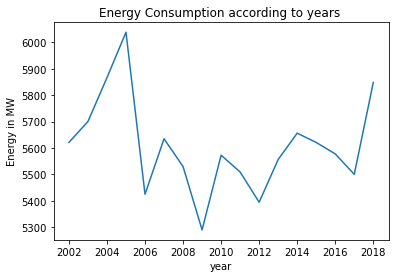

In [22]:
##  plotting mean of energy consumption for year
sns.lineplot(x=df2_year.index,y=df2_year,data='df2')
plt.title("Energy Consumption according to years ")
plt.xlabel("year")
plt.ylabel("Energy in MW")


###### so from the above figure we can see that high amount of energy consumed in the year 2002-2006 and 2018 compared to the other years

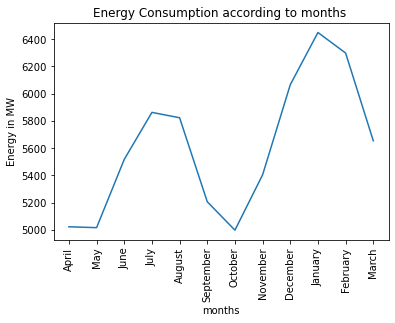

In [23]:
##  plotting mean of energy consumption for months 
sns.lineplot(x=df2_month.index,y=df2_month,data='df2')
plt.title("Energy Consumption according to months ")
plt.xlabel("months")
plt.ylabel("Energy in MW")
plt.xticks(rotation=90)
plt.show()

###### For summer and winter months typically have higher energy demand while spring and fall are lower. This matches intuition that months with more extreme temperatures have more energy consumption (likely due to increased use of air conditioners/fans and heaters).

Text(0, 0.5, 'Energy in MW')

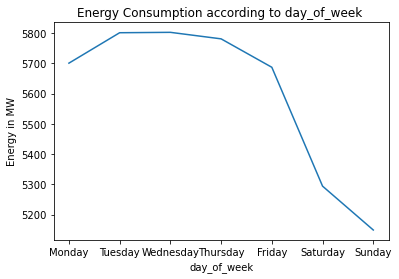

In [24]:
##  plotting mean of  energy consumption for day of week
sns.lineplot(x=df2_day_of_week.index,y=df2_day_of_week,data='df2')
plt.title("Energy Consumption according to day_of_week ")
plt.xlabel("day_of_week")
plt.ylabel("Energy in MW")

###### Energy consumption on Saturday and Sunday are lower. This reflects the intuition that energy use is typically lower on the weekends.

Text(0, 0.5, 'Energy in MW')

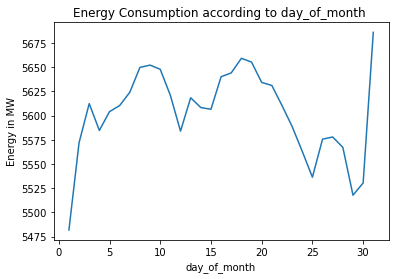

In [25]:
##  plotting  mean of energy consumption for day of month
sns.lineplot(x=df2_day_of_month.index,y=df2_day_of_month,data='df2')
plt.title("Energy Consumption according to day_of_month ")
plt.xlabel("day_of_month")
plt.ylabel("Energy in MW")

Text(0, 0.5, 'Energy in MW')

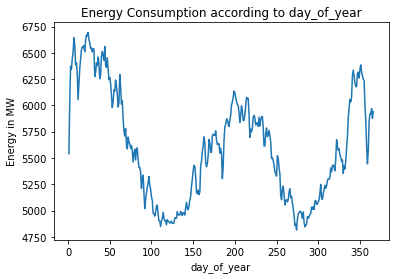

In [26]:
##  plotting mean of energy consumption for day of year
sns.lineplot(x=df2_day_of_year.index,y=df2_day_of_year,data='df2')
plt.title("Energy Consumption according to day_of_year")
plt.xlabel("day_of_year")
plt.ylabel("Energy in MW")

Text(0, 0.5, 'Energy in MW')

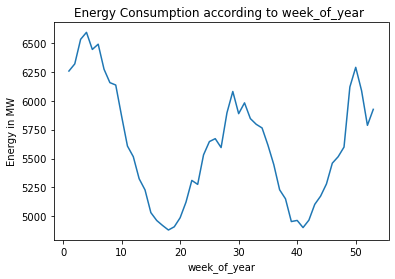

In [27]:
##  plotting mean of energy consumption for week of year
sns.lineplot(x=df2_week_of_year.index,y=df2_week_of_year,data='df2')
plt.title("Energy Consumption according to week_of_year ")
plt.xlabel('week_of_year')
plt.ylabel("Energy in MW")

Text(0, 0.5, 'Energy in MW')

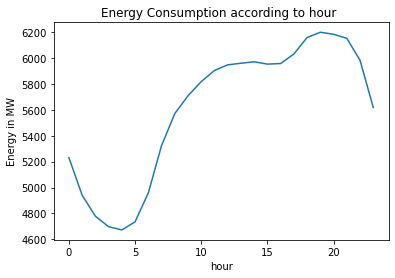

In [28]:
##  plotting mean of energy consumption for hour
sns.lineplot(x=df2_hour.index,y=df2_hour,data='df2')
plt.title("Energy Consumption according to hour ")
plt.xlabel('hour')
plt.ylabel("Energy in MW")

###### Here we can see the daily trend of energy consumption decreasing from 8pm to 5am. This reflects intuition that energy demand is lower at night when consumers are typically asleep. We also see an upward trend between 5am to 7pm. This reflects intuition that energy demand increases as consumers begin their day and evening. 

### Run an ETS Decomposition 

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

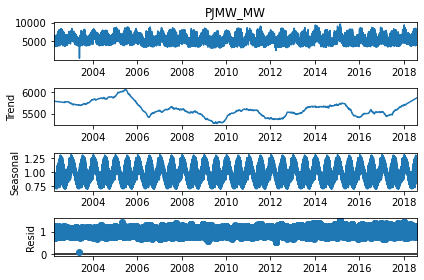

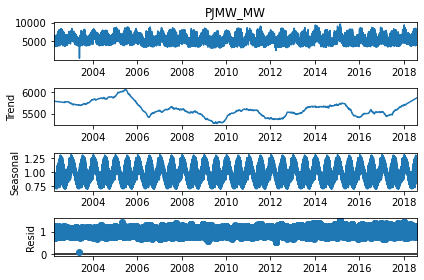

In [30]:
result_decomp = seasonal_decompose(df['PJMW_MW'], model='multiplicative', extrapolate_trend='freq', period=365*24 )
result_decomp.plot()

### Energy Distribution:

C:\Users\mrsks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distrinution')

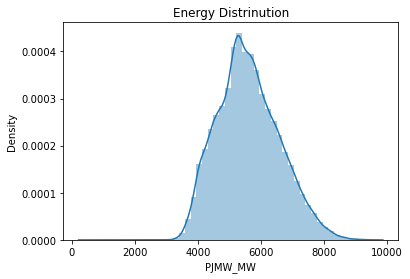

In [31]:
sns.distplot(df["PJMW_MW"])
plt.title("Energy Distrinution")

### Resampling of data 

In [32]:
newdf = df.resample('D').mean()

In [33]:
print("Old Dataset : ", df.shape)
print("New Dataset : ", newdf.shape)

Old Dataset :  (143232, 1)
New Dataset :  (5969, 1)


In [34]:
newdf.head()

,PJMW_MW
Datetime,
2002-04-01,5271.173913
2002-04-02,5310.416667
2002-04-03,5325.916667
2002-04-04,5670.791667
2002-04-05,5686.125000


In [35]:
newdf.tail()

,PJMW_MW
Datetime,
2018-07-30,5492.708333
2018-07-31,5660.750000
2018-08-01,5959.708333
2018-08-02,5805.041667
2018-08-03,5489.000000


In [36]:
newdf.drop(newdf.index[:1371],axis=0,inplace=True)
newdf

,PJMW_MW
Datetime,
2006-01-01,5021.833333
2006-01-02,5503.291667
2006-01-03,5798.000000
2006-01-04,5793.750000
2006-01-05,5866.625000
...,...
2018-07-30,5492.708333
2018-07-31,5660.750000
2018-08-01,5959.708333


In [37]:
newdf=newdf.astype(int)
newdf


,PJMW_MW
Datetime,
2006-01-01,5021
2006-01-02,5503
2006-01-03,5798
2006-01-04,5793
2006-01-05,5866
...,...
2018-07-30,5492
2018-07-31,5660
2018-08-01,5959


### converting time series data set to regression data set

In [38]:
newdf['x1']=newdf['PJMW_MW'].shift(+1)
newdf['x2']=newdf['PJMW_MW'].shift(+2)
newdf['x3']=newdf['PJMW_MW'].shift(+3)
newdf['x4']=newdf['PJMW_MW'].shift(+4)
newdf['x5']=newdf['PJMW_MW'].shift(+5)
newdf['x6']=newdf['PJMW_MW'].shift(+6)
newdf['x7']=newdf['PJMW_MW'].shift(+7)

In [39]:
newdf.dropna(inplace = True)
newdf

,PJMW_MW,x1,x2,x3,x4,x5,x6,x7
Datetime,,,,,,,,
2006-01-08,5383,6030.0,6178.0,5866.0,5793.0,5798.0,5503.0,5021.0
2006-01-09,5516,5383.0,6030.0,6178.0,5866.0,5793.0,5798.0,5503.0
2006-01-10,5634,5516.0,5383.0,6030.0,6178.0,5866.0,5793.0,5798.0
2006-01-11,5661,5634.0,5516.0,5383.0,6030.0,6178.0,5866.0,5793.0
2006-01-12,5536,5661.0,5634.0,5516.0,5383.0,6030.0,6178.0,5866.0
...,...,...,...,...,...,...,...,...
2018-07-30,5492,5293.0,5485.0,5978.0,6216.0,6036.0,6142.0,5900.0
2018-07-31,5660,5492.0,5293.0,5485.0,5978.0,6216.0,6036.0,6142.0
2018-08-01,5959,5660.0,5492.0,5293.0,5485.0,5978.0,6216.0,6036.0


### separate the x values and y values

In [40]:
x=newdf.iloc[:,1:8]
y=newdf.iloc[:,0]

In [41]:
y

Datetime
2006-01-08    5383
2006-01-09    5516
2006-01-10    5634
2006-01-11    5661
2006-01-12    5536
              ... 
2018-07-30    5492
2018-07-31    5660
2018-08-01    5959
2018-08-02    5805
2018-08-03    5489
Freq: D, Name: PJMW_MW, Length: 4591, dtype: int32

In [42]:
x

,x1,x2,x3,x4,x5,x6,x7
Datetime,,,,,,,
2006-01-08,6030.0,6178.0,5866.0,5793.0,5798.0,5503.0,5021.0
2006-01-09,5383.0,6030.0,6178.0,5866.0,5793.0,5798.0,5503.0
2006-01-10,5516.0,5383.0,6030.0,6178.0,5866.0,5793.0,5798.0
2006-01-11,5634.0,5516.0,5383.0,6030.0,6178.0,5866.0,5793.0
2006-01-12,5661.0,5634.0,5516.0,5383.0,6030.0,6178.0,5866.0
...,...,...,...,...,...,...,...
2018-07-30,5293.0,5485.0,5978.0,6216.0,6036.0,6142.0,5900.0
2018-07-31,5492.0,5293.0,5485.0,5978.0,6216.0,6036.0,6142.0
2018-08-01,5660.0,5492.0,5293.0,5485.0,5978.0,6216.0,6036.0


### splitting the data into tranning and testing

In [43]:
size_x = int(len(x)*0.92)
size_y = int(len(y)*0.92)
x_train,x_test,y_train,y_test = x.iloc[:size_x], x.iloc[size_x:], y.iloc[:size_y], y.iloc[size_y:]

In [44]:
x_train

,x1,x2,x3,x4,x5,x6,x7
Datetime,,,,,,,
2006-01-08,6030.0,6178.0,5866.0,5793.0,5798.0,5503.0,5021.0
2006-01-09,5383.0,6030.0,6178.0,5866.0,5793.0,5798.0,5503.0
2006-01-10,5516.0,5383.0,6030.0,6178.0,5866.0,5793.0,5798.0
2006-01-11,5634.0,5516.0,5383.0,6030.0,6178.0,5866.0,5793.0
2006-01-12,5661.0,5634.0,5516.0,5383.0,6030.0,6178.0,5866.0
...,...,...,...,...,...,...,...
2017-07-27,5708.0,5542.0,6135.0,5634.0,5830.0,6677.0,6875.0
2017-07-28,6019.0,5708.0,5542.0,6135.0,5634.0,5830.0,6677.0
2017-07-29,5729.0,6019.0,5708.0,5542.0,6135.0,5634.0,5830.0


In [45]:
x_test

,x1,x2,x3,x4,x5,x6,x7
Datetime,,,,,,,
2017-08-01,5757.0,4859.0,4818.0,5729.0,6019.0,5708.0,5542.0
2017-08-02,6015.0,5757.0,4859.0,4818.0,5729.0,6019.0,5708.0
2017-08-03,6215.0,6015.0,5757.0,4859.0,4818.0,5729.0,6019.0
2017-08-04,6205.0,6215.0,6015.0,5757.0,4859.0,4818.0,5729.0
2017-08-05,6108.0,6205.0,6215.0,6015.0,5757.0,4859.0,4818.0
...,...,...,...,...,...,...,...
2018-07-30,5293.0,5485.0,5978.0,6216.0,6036.0,6142.0,5900.0
2018-07-31,5492.0,5293.0,5485.0,5978.0,6216.0,6036.0,6142.0
2018-08-01,5660.0,5492.0,5293.0,5485.0,5978.0,6216.0,6036.0


In [46]:
y_train

Datetime
2006-01-08    5383
2006-01-09    5516
2006-01-10    5634
2006-01-11    5661
2006-01-12    5536
              ... 
2017-07-27    6019
2017-07-28    5729
2017-07-29    4818
2017-07-30    4859
2017-07-31    5757
Freq: D, Name: PJMW_MW, Length: 4223, dtype: int32

In [47]:
y_test

Datetime
2017-08-01    6015
2017-08-02    6215
2017-08-03    6205
2017-08-04    6108
2017-08-05    4997
              ... 
2018-07-30    5492
2018-07-31    5660
2018-08-01    5959
2018-08-02    5805
2018-08-03    5489
Freq: D, Name: PJMW_MW, Length: 368, dtype: int32

### Building Random forest model

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
r_model = RandomForestClassifier(n_estimators=100, max_features=3,random_state=40,criterion='gini').fit(x_train,y_train)

In [50]:
r_pred=r_model.predict(x_test)

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error

rmse_rf=sqrt(mean_squared_error(r_pred,y_test))
mse_rf= (mean_squared_error(r_pred,y_test))
mape_rf=round((mean_absolute_percentage_error(r_pred,y_test)*100),3)




print(f'MSE random forest Error: {mse_rf}\nRMSE random forest Error: {rmse_rf}\nMAPE random forest: {mape_rf}')

MSE random forest Error: 236917.22826086957
RMSE random forest Error: 486.7414388162051
MAPE random forest: 6.47


### linear regression model

In [52]:
from sklearn.linear_model import LinearRegression
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [53]:
l_pred=l_model.predict(x_test)

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error
rmse_linr=sqrt(mean_squared_error(l_pred,y_test))
mse_linr= (mean_squared_error(l_pred,y_test))
mape_linr=round((mean_absolute_percentage_error(l_pred,y_test)*100),3)




print(f'MSE linear regression : {mse_linr}\nRMSE linear regression : {rmse_linr}\nMAPE linear regression: {mape_linr}')

MSE linear regression : 123245.29422721764
RMSE linear regression : 351.0630915194841
MAPE linear regression: 4.726


### calculating forecasting accuracy

#### LR Model

In [55]:
final_l_model=LinearRegression()

final_l_model.fit(x,y)

LinearRegression()

In [56]:
forecast_check_data =np.array(newdf['PJMW_MW'][:'2018-07-04'][-7:])

In [57]:
forecast_check_data

array([6050, 6237, 6173, 6321, 6816, 6852, 6484])

In [58]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    lin_f_chk=final_l_model.predict(ck)
    z=np.append(z,lin_f_chk)
    i=+1
future_pred_lr=z[-30:]

C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

In [59]:
import warnings

In [60]:
future_pred_lr

array([6069.0194465 , 6208.79020897, 6133.44290887, 6129.59221219,
       6520.11926819, 6666.63027723, 6624.37000066, 6093.73453685,
       6214.79745371, 6114.39008362, 6028.39346697, 6326.9000919 ,
       6377.01077386, 6711.98261128, 6072.12759462, 6261.2843317 ,
       6095.41502886, 5960.64692936, 6279.54306903, 6007.85453024,
       6803.78226801, 5947.4147726 , 6358.19747061, 6074.72569598,
       5857.79756547, 6420.99696237, 5528.97743874, 7005.86513244,
       5650.47059056, 6523.6687496 ])

In [61]:
future_chk = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df = pd.DataFrame(index=future_chk)

In [62]:
future_chk_df['future_chk_energy'] = future_pred_lr.tolist()

In [63]:
newdf_last_30 = newdf['PJMW_MW'].tail(30)

In [64]:
MAPE_check= round((mean_absolute_percentage_error(newdf_last_30 ,future_chk_df)*100),3)

In [65]:
RMSE_check=sqrt(mean_squared_error(future_chk_df,newdf_last_30))

In [66]:
print('RMSE for forecast check is:',RMSE_check)
print('MAPE for forecast check is:',MAPE_check)

RMSE for forecast check is: 589.3402105235938
MAPE for forecast check is: 8.353


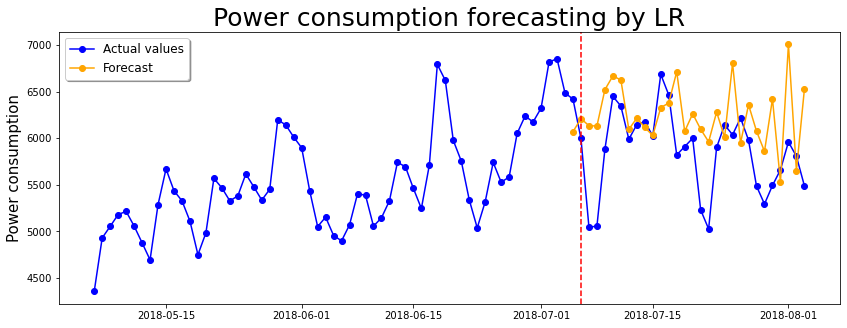

In [67]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by LR", fontsize=25)

plt.plot(newdf[-90:].PJMW_MW, label='Actual values', color="blue", marker="o")

plt.plot(future_chk_df.index,future_chk_df.values, label='Forecast', color="orange", marker="o")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(future_chk_df.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

### Forecast for future  using linear regression model

In [68]:
final_l_model=LinearRegression()

final_l_model.fit(x,y)

LinearRegression()

In [69]:
newdf_last_7 = np.array(newdf['PJMW_MW'].tail(7))
newdf_last_7

array([5485, 5293, 5492, 5660, 5959, 5805, 5489])

In [70]:
z=newdf_last_7

for i in range(0,30):
    r=z[-7:]
    r=np.array([r])
    ranf_f=final_l_model.predict(r)
    z=np.append(z,ranf_f)
    i=+1
future_pred=z[-30:]

C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mrsks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

In [71]:
future_pred

array([5606.93332054, 5286.75524388, 5529.96020842, 5452.52613566,
       5849.96408134, 5861.13015676, 5489.58665547, 5776.55967806,
       5217.39510914, 5682.34460185, 5277.70660667, 5737.23845512,
       5899.72313243, 5378.25791682, 6044.89196638, 5013.1766278 ,
       5965.33595685, 5102.63336403, 5644.50484062, 5990.74044313,
       5071.95787233, 6515.69651489, 4561.11022606, 6443.25982755,
       4866.07756086, 5562.40160493, 6255.45452736, 4413.29728404,
       7392.494691  , 3657.40315365])

In [72]:
future = pd.date_range('2018-08-04','2018-09-02', freq='D')
future_df = pd.DataFrame(index=future)

In [73]:
future_df['future_PJMW_MW'] = future_pred.tolist()

In [74]:
print(future_df)

            future_PJMW_MW
2018-08-04     5606.933321
2018-08-05     5286.755244
2018-08-06     5529.960208
2018-08-07     5452.526136
2018-08-08     5849.964081
2018-08-09     5861.130157
2018-08-10     5489.586655
2018-08-11     5776.559678
2018-08-12     5217.395109
2018-08-13     5682.344602
2018-08-14     5277.706607
2018-08-15     5737.238455
2018-08-16     5899.723132
2018-08-17     5378.257917
2018-08-18     6044.891966
2018-08-19     5013.176628
2018-08-20     5965.335957
2018-08-21     5102.633364
2018-08-22     5644.504841
2018-08-23     5990.740443
2018-08-24     5071.957872
2018-08-25     6515.696515
2018-08-26     4561.110226
2018-08-27     6443.259828
2018-08-28     4866.077561
2018-08-29     5562.401605
2018-08-30     6255.454527
2018-08-31     4413.297284
2018-09-01     7392.494691
2018-09-02     3657.403154


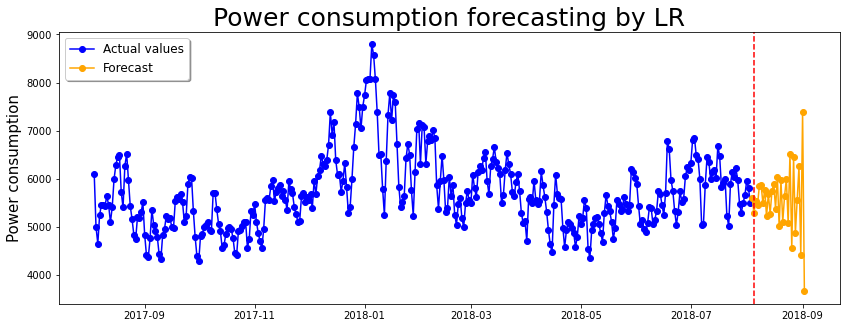

In [75]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by LR", fontsize=25)

plt.plot(newdf[-365:].PJMW_MW, label='Actual values', color="blue", marker="o")

plt.plot(future_df.index,future_df.values,label='Forecast', color="orange", marker="o")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(future_df.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [81]:
import pickle
import streamlit as st

filename = 'PJMWForecasting.sav'

In [84]:
pickle.dump(final_l_model, open('PJMWForecasting.pkl','wb'))

In [83]:
# loading the saved model 
load_model = pickle.load(open(filename,'rb'))